This notebook shows the process to extract the ROI (1.35km x 1.35km squared image centered on the site) from Sentinel-2 raw images. Meanwhile the calculation of NIRV reflectance is calculated and therefore the output image will only contain the values of NIRV reflactance. 

In [2]:
import os
# import math
import numpy as np
import shapely as shp
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio as rio
import rasterio.mask

In [3]:
cwd = "c:\\Users\\m1865\\Desktop\\DISC"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw (Replication)"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed (Replication)"

### 1. Read all the Sentinel-2 raw images

In [4]:
# Get the names of the folders in the raw image directory
list_Raw_Name = ['Australia - Cape']

In [5]:
# Get paths to all the 10m-resolution .jp2 files
list_Raw_10m = []
for raw_Name in list_Raw_Name:
    # Create a temporary list to store the paths to all the 10m-resolution .jp2
    temp_List = []
    # Find all the files under the directory and filter out those irrelevant
    for path, subdirs, files in os.walk(cwd_Images_Raw + "\\" + raw_Name + "\\L2A"):
        for name in files:
            temp = os.path.join(path, name)
            if temp[-3:] == 'jp2' and "B0" in temp and "10m" in temp:
                # print(temp)
                temp_List.append(temp)
    list_Raw_10m.append(temp_List)
del raw_Name, temp_List
list_Raw_10m[0]

['c:\\Users\\m1865\\Desktop\\DISC\\Sentinel-2 Images Raw (Replication)\\Australia - Cape\\L2A\\S2A_MSIL2A_20161009T003952_N0500_R059_T55LCC_20230922T143431.SAFE\\GRANULE\\L2A_T55LCC_A006777_20161009T003951\\IMG_DATA\\R10m\\T55LCC_20161009T003952_B02_10m.jp2',
 'c:\\Users\\m1865\\Desktop\\DISC\\Sentinel-2 Images Raw (Replication)\\Australia - Cape\\L2A\\S2A_MSIL2A_20161009T003952_N0500_R059_T55LCC_20230922T143431.SAFE\\GRANULE\\L2A_T55LCC_A006777_20161009T003951\\IMG_DATA\\R10m\\T55LCC_20161009T003952_B03_10m.jp2',
 'c:\\Users\\m1865\\Desktop\\DISC\\Sentinel-2 Images Raw (Replication)\\Australia - Cape\\L2A\\S2A_MSIL2A_20161009T003952_N0500_R059_T55LCC_20230922T143431.SAFE\\GRANULE\\L2A_T55LCC_A006777_20161009T003951\\IMG_DATA\\R10m\\T55LCC_20161009T003952_B04_10m.jp2',
 'c:\\Users\\m1865\\Desktop\\DISC\\Sentinel-2 Images Raw (Replication)\\Australia - Cape\\L2A\\S2A_MSIL2A_20161009T003952_N0500_R059_T55LCC_20230922T143431.SAFE\\GRANULE\\L2A_T55LCC_A006777_20161009T003951\\IMG_DATA\\R10

In [6]:
# Read them via rasterio package
list_Image_10m = []
for item in list_Raw_10m[0]:
    temp = rio.open(item)
    list_Image_10m.append(temp)
list_Image_10m[2]

<open DatasetReader name='c:/Users/m1865/Desktop/DISC/Sentinel-2 Images Raw (Replication)/Australia - Cape/L2A/S2A_MSIL2A_20161009T003952_N0500_R059_T55LCC_20230922T143431.SAFE/GRANULE/L2A_T55LCC_A006777_20161009T003951/IMG_DATA/R10m/T55LCC_20161009T003952_B04_10m.jp2' mode='r'>

In [7]:
# Get the 2d array by reading the band
list_Band_10m = []
for item in list_Image_10m:
    temp = item.read(1)
    list_Band_10m.append(temp)
list_Band_10m[2]

array([[2710, 2712, 2766, ..., 1737, 1588, 1636],
       [2818, 2890, 2852, ..., 1672, 1542, 1604],
       [2934, 2982, 2846, ..., 1620, 1558, 1588],
       ...,
       [1794, 1720, 1620, ...,    0,    0,    0],
       [1718, 1652, 1670, ...,    0,    0,    0],
       [1766, 1697, 1773, ...,    0,    0,    0]], dtype=uint16)

### 2. Read sites information

In [8]:
df_Sites = pd.DataFrame({
    "Site": ['Cape'],
    "Latitude": [-16.11],
    "Longitude": [145.45]
})
df_Sites

,Site,Latitude,Longitude
0,Cape,-16.11,145.45


### 3. Create a shapefile of the site Havard

In [9]:
# Create a point shapefile based on the site, using Lon-Lat
gdf_4326 = gpd.GeoDataFrame(
    df_Sites,
    geometry = gpd.points_from_xy(df_Sites['Longitude'], df_Sites['Latitude']),
    crs = "EPSG:4326"
)
gdf_4326

,Site,Latitude,Longitude,geometry
0,Cape,-16.11,145.45,POINT (145.45000 -16.11000)


In [10]:
# Check the crs of Sentinel-2 images
list_Image_10m[2].crs

CRS.from_epsg(32755)

In [11]:
# In case the convertion of CRS of a raster by using rasterio
# from rasterio.crs import CRS
# raster_new = raster.rio.reproject(CRS.from_string('EPSG:4326'))

In [12]:
# Converting Lon-Lat to UTM coordinates!
# Attention that the CRS in USA for meter unit is 32618!!! Not 32632!!! 
gdf_32755 = gdf_4326.copy()
gdf_32755 = gdf_32755.to_crs('EPSG:32755')
gdf_32755

,Site,Latitude,Longitude,geometry
0,Cape,-16.11,145.45,POINT (334236.876 8218274.705)


In [13]:
# gdf_4326.to_file(cwd_Images_Processed + "\\Havard\\shp_Havard_4326.shp")
# gdf_4326.to_file(cwd_Images_Processed + "\\Havard\\shp_Havard_4326.json", driver = "GeoJSON")
# gdf_32618.to_file(cwd_Images_Processed + "\\Havard\\shp_Havard_32618.shp")
# gdf_32618.to_file(cwd_Images_Processed + "\\Havard\\shp_Havard_32618.json", driver = "GeoJSON")

### 4. Assign the site to a pixel, and then create a 1000m2, 1.5km2 and 10000m2 square geodataframe

In [14]:
# Check the bounds of Sentinel-2 images first
list_Image_10m[2].bounds

BoundingBox(left=300000.0, bottom=8190220.0, right=409800.0, top=8300020.0)

In [15]:
# First we retrieve the x, y coordinate of our site
site_x = gdf_32755.geometry.x.values[0]
site_y = gdf_32755.geometry.y.values[0]
print("Site X, Y: " + str(site_x) + "," + str(site_y))

Site X, Y: 334236.87638385384,8218274.705050469


In [16]:
# Then we get the row, col of our site in the raster, so that we know the pixel the site belongs to
site_row, site_col = list_Image_10m[2].index(site_x, site_y)
print("Site falls on the pixel: " + str(site_row) + ", " + str(site_col))

Site falls on the pixel: 8174, 3423


In [17]:
# Now we get the spatial coordinates of that pixel (coordinates of its center)
site_pixel_x, site_pixel_y = list_Image_10m[2].xy(site_row, site_col)
print("The spatial coordinates of the (center) pixel which the site falls on is: " + str(site_pixel_x) + ", " + str(site_pixel_y))

The spatial coordinates of the (center) pixel which the site falls on is: 334235.0, 8218275.0


In [31]:
# Get the coordinates of the four corners
# 500m
site_x_left_500m = site_pixel_x - 255
site_x_right_500m = site_pixel_x + 255
site_y_top_500m = site_pixel_y + 255
site_y_bottom_500m = site_pixel_y - 255
# 1000m
site_x_left_1000m = site_pixel_x - 505
site_x_right_1000m = site_pixel_x + 505
site_y_top_1000m = site_pixel_y + 505
site_y_bottom_1000m = site_pixel_y - 505
# 6000m
site_x_left_6000m = site_pixel_x - 3005
site_x_right_6000m = site_pixel_x + 3005
site_y_top_6000m = site_pixel_y + 3005
site_y_bottom_6000m = site_pixel_y - 3005
# 10000m
site_x_left_10000m = site_pixel_x - 5005
site_x_right_10000m = site_pixel_x + 5005
site_y_top_10000m = site_pixel_y + 5005
site_y_bottom_10000m = site_pixel_y - 5005

In [32]:
# Now we need to form a 1-km square shapefile, which will be the internal area of which we will evaluate the spatial representativeness. 
shp_500m = shp.box(site_x_left_500m, site_y_bottom_500m, site_x_right_500m, site_y_top_500m)
gdf_500m = gpd.GeoDataFrame(
    [1],
    geometry=[shp_500m],
    crs = "EPSG:32755"
)
shp_500m.area

260100.0

In [33]:
# Now we need to form a 1-km square shapefile, which will be the internal area of which we will evaluate the spatial representativeness. 
shp_1000m = shp.box(site_x_left_1000m, site_y_bottom_1000m, site_x_right_1000m, site_y_top_1000m)
gdf_1000m = gpd.GeoDataFrame(
    [1],
    geometry=[shp_1000m],
    crs = "EPSG:32755"
)
gdf_1000m.area

0    1020100.0
dtype: float64

In [34]:
shp_6000m = shp.box(site_x_left_6000m, site_y_bottom_6000m, site_x_right_6000m, site_y_top_6000m)
gdf_6000m = gpd.GeoDataFrame(
    [1],
    geometry=[shp_6000m],
    crs = "EPSG:32755"
)
shp_10000m = shp.box(site_x_left_10000m, site_y_bottom_10000m, site_x_right_10000m, site_y_top_10000m)
gdf_10000m = gpd.GeoDataFrame(
    [1],
    geometry=[shp_10000m],
    crs = "EPSG:32755"
)

Text(0.5, 1.0, '1000m Square (Internal Area)')

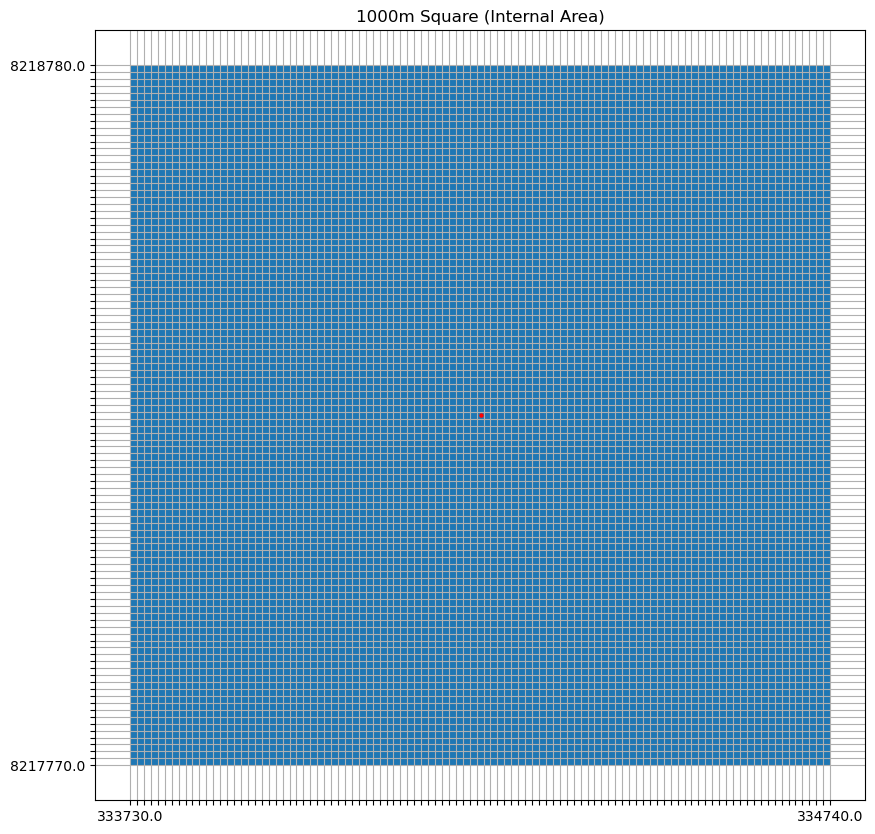

In [35]:
# Plot to check!
fig, ax = plt.subplots(figsize = (10,10))
gdf_1000m.plot(ax = ax)
gdf_32755.plot(ax = ax, color = 'red', markersize = 5)
ax.set_xticks(np.arange(site_x_left_1000m, site_x_right_1000m + 10, 10))
ax.set_yticks(np.arange(site_y_bottom_1000m, site_y_top_1000m + 10, 10))
ax.set_xticklabels([tick if tick == site_x_left_1000m or tick == site_x_right_1000m else None for tick in ax.get_xticks()])
ax.set_yticklabels([tick if tick == site_y_bottom_1000m or tick == site_y_top_1000m else None for tick in ax.get_yticks()])
ax.grid()
ax.set_title("1000m Square (Internal Area)")

### 5. Calculate surface albedo! 
0.726b3 – 0.322b3^2 – 0.015b8 + 0.581b8^2

In [36]:
Albedo = 0.726 * (list_Band_10m[1].astype(float) / 10000) - 0.322 * ((list_Band_10m[1].astype(float) / 10000) ** 2) - 0.015 * (list_Band_10m[3].astype(float) / 10000) + 0.581 * ((list_Band_10m[3].astype(float) / 10000) ** 2)
Albedo

array([[0.32116239, 0.32814467, 0.32473455, ..., 0.12599204, 0.12199721,
        0.12834762],
       [0.33794863, 0.3382678 , 0.32441097, ..., 0.1181191 , 0.11533785,
        0.12897293],
       [0.35023973, 0.34022488, 0.32857514, ..., 0.1226081 , 0.1180026 ,
        0.12476519],
       ...,
       [0.1743786 , 0.16194022, 0.15353991, ..., 0.        , 0.        ,
        0.        ],
       [0.16899046, 0.16784846, 0.16065049, ..., 0.        , 0.        ,
        0.        ],
       [0.16093662, 0.16400248, 0.16473519, ..., 0.        , 0.        ,
        0.        ]])

In [37]:
src = list_Image_10m[0]
out_meta = src.meta
out_meta.update({
    "driver": "GTiff",
    "dtype": 'float64'
})
with rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cape.tif", 'w', **out_meta) as dest:
    dest.write(Albedo, 1)

### 6. Clip to the extent of 1000m, 6000m and 10000m

In [38]:
src = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cape.tif")
out_image, out_transform = rio.mask.mask(src, gdf_1000m.geometry, crop=True)
out_meta = src.meta
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cape 1000m.tif", "w", **out_meta) as dest:
    dest.write(out_image)

CPLE_AppDefinedError: Deleting c:/Users/m1865/Desktop/DISC/Sentinel-2 Images Processed (Replication)/Australia/Albedo Cape 1000m.tif failed: Permission denied

In [39]:
src = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cape.tif")
out_image, out_transform = rio.mask.mask(src, gdf_6000m.geometry, crop=True)
out_meta = src.meta
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cape 6000m.tif", "w", **out_meta) as dest:
    dest.write(out_image)

In [ ]:
src = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cape.tif")
out_image, out_transform = rio.mask.mask(src, gdf_10000m.geometry, crop=True)
out_meta = src.meta
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cape 10000m.tif", "w", **out_meta) as dest:
    dest.write(out_image)

### RESAMPLE?

In [40]:
from rasterio.enums import Resampling

# Resample 10000m (10m pixel -> 20m pixel)

upscale_factor = 0.2

with rasterio.open(cwd_Images_Processed + "\\Australia\\Albedo Cape 6000m.tif") as dataset:

    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.average
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )

    out_meta = dataset.meta
    out_meta.update({
        "height": data.shape[-2],
        "width": data.shape[-1],
        "transform": transform
        })

    with rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cape 6000m RE.tif", "w", **out_meta) as dest:
        dest.write(out_image)

In [ ]:
from rasterio.enums import Resampling

# Resample 10000m (10m pixel -> 20m pixel)

upscale_factor = 0.1

with rasterio.open(cwd_Images_Processed + "\\Australia\\Albedo Cape 10000m.tif") as dataset:

    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.average
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )

    out_meta = dataset.meta
    out_meta.update({
        "height": data.shape[-2],
        "width": data.shape[-1],
        "transform": transform
        })

    with rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cape 10000m RE.tif", "w", **out_meta) as dest:
        dest.write(out_image)